# Analysis of a given area data, by Pietro Terna$^1$ and Stefano Terna$^2$  
$^1$ Univerity of Torino, Italy (retired) & Collegio Carlo Alberto, Italy  
$^2$ PhD, [tomorrowdata.io](https://tomorrowdata.io)

base of tth data https://github.com/pcm-dpc/COVID-19

definitions https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-covid19-italia.md#dati-per-regione

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

area='Piemonte'
# area names: Abruzzo | Basilicata | Calabria | Campania | Emilia-Romagna | 
#             Friuli Venezia Giulia |  Lazio | Liguria | Lombardia | Marche | 
#             Molise | P.A. Bolzano | P.A. Trento | Piemonte | Puglia | Sardegna | 
#             Sicilia | Toscana | Umbria | Valle d'Aosta | Veneto

def parse_date(date):
    return datetime.strptime(date[:10], '%Y-%m-%d')

regional_data = pd.read_csv(
    'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv',
    parse_dates=['data'],
    date_parser=parse_date)

area_data=regional_data[regional_data.denominazione_regione==area]
area_data=area_data.rename(columns = {'data': 'dates'},inplace = False)

relevant_columns=['dates','ricoverati_con_sintomi','terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati'];
# https://matplotlib.org/3.1.0/gallery/color/named_colors.html
colorDict={'ricoverati_con_sintomi':'lightgray', 'terapia_intensiva':'darkgray',
           'totale_ospedalizzati':'dimgray', 'isolamento_domiciliare':'brown', 
           'totale_positivi':'red','variazione_totale_positivi':' orange', 
           'nuovi_positivi':'olive', 'dimessi_guariti':'yellowgreen','deceduti':'black',
           'casi_da_sospetto_diagnostico':'fuchsia', 'casi_da_screening':'darkviolet',
           'totale_casi':'blue', 'tamponi':'green', 'casi_testati':'lime',
           'totale_positivi_corr':'red','totale_casi_corr':'blue',
           'casi_da_screening_diff14days':'deeppink',
           'totale_positiviD':'red','totale_positiviD':'red',
           'totale_casiD':'blue','totale_casiDD':'blue',
           'totale_positivi_corrD':'red','totale_positivi_corrDD':'red',
           'totale_casi_corrD':'blue','totale_casi_corrDD':'blue'}
area_data.columns

Index(['dates', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note'],
      dtype='object')

<br/>

# Definitions
**from the [Protezione Civile](https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-covid19-italia.md#dati-per-regione) web site [in square brakets my addenda]**   
   
**ricoverati_con_sintomi <span style="color: red;">[stock in a given day]</span>**  
Ricoverati con sintomi | Hospitalised patients with symptoms  

**terapia_intensiva <span style="color: red;">[stock in a given day]</span>**  
Ricoverati in terapia intensiva	| Intensive Care  
  
**totale_ospedalizzati <span style="color: red;">[stock in a given day]</span>**  
Totale ospedalizzati | Total hospitalised patients  
  
**isolamento_domiciliare <span style="color: red;">[stock in a given day]</span>**  
Persone in isolamento domiciliare | Home confinement  
  
**totale_positivi <span style="color: red;">[stock in a given day]</span>**  
Totale attualmente positivi (ospedalizzati + isolamento domiciliare) | Total amount of current positive cases (Hospitalised patients + Home confinement)  
  
**variazione_totale_positivi <span style="color: red;">[first difference of totale_positivi]</span>**  
Variazione del totale positivi (totale_positivi giorno corrente - totale_positivi giorno precedente) | News amount of current positive cases (totale_positivi current day - totale_positivi previous day)  
  
**nuovi_positivi <span style="color: red;">[first difference of totale_casi]</span>**  
Nuovi attualmente positivi (totale_casi giorno corrente - totale_casi giorno precedente) | News amount of current positive cases (totale_casi current day - totale_casi previous day)  
  
**dimessi_guariti <span style="color: red;">[cumulative values]</span>**  
Persone dimesse guarite | Recovered  
  
**deceduti <span style="color: red;">[cumulative values]</span>**  
Persone decedute | Death  
  
**casi_da_sospetto_diagnostico <span style="color: red;">[cumulative values]</span>**  
Casi positivi al tampone emersi da attività clinica | Positive cases emerged from clinical activity  
  
**casi_da_screening <span style="color: red;">[cumulative values]</span>**  
Casi positivi emersi da indagini e test, pianificati a livello nazionale o regionale | Positive cases emerging from surveys and tests, planned at national or regional level  
  
**totale_casi <span style="color: red;">[cumulative values]</span>**  
Totale casi positivi | Total amount of positive cases  
  
**tamponi <span style="color: red;">[cumulative values]</span>**  
Totale tamponi - Tests performed  
  
**casi_testati <span style="color: red;">[cumulative values]</span>**  
Totale dei soggetti sottoposti al test | Total number of people tested    
  
  
**<span style="color: red;">Nota Bene</span>**  

summing stocks  
ricoverati_con_sintomi+terapia_intensiva+isolamento_domiciliare **<span style="color: red;">=></span>** totale_positivi  
  
summing a stock and two cumulative values  
totale_positivi+dimessi_guariti+deceduti **<span style="color: red;">=></span>** totale_casi  
  
the same, summing two cumulative values  
casi_da_sospetto_diagnostico+casi_da_screening **<span style="color: red;">=></span>** totale_casi  

<br/>


# Data from the last three days  
<br/>



In [2]:
area

'Piemonte'

In [3]:
area_data[-3:][relevant_columns]

,dates,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati
5452,2020-11-09,4540,312,4852,51404,56256,2059,2876,39721,4678,43124.0,57531.0,100655,1162525,735109.0
5473,2020-11-10,4715,325,5040,53795,58835,2579,3659,40737,4742,44444.0,59870.0,104314,1178337,745706.0
5494,2020-11-11,4790,340,5130,55224,60354,1519,2953,42087,4826,45698.0,61569.0,107267,1191915,755259.0


### First differences  

In [4]:
area_data[relevant_columns].diff()[-3:]

,dates,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati
5452,1 days,173.0,8.0,181.0,1878.0,2059.0,-649.0,-1008.0,768.0,49.0,803.0,2073.0,2876.0,13036.0,8910.0
5473,1 days,175.0,13.0,188.0,2391.0,2579.0,520.0,783.0,1016.0,64.0,1320.0,2339.0,3659.0,15812.0,10597.0
5494,1 days,75.0,15.0,90.0,1429.0,1519.0,-1060.0,-706.0,1350.0,84.0,1254.0,1699.0,2953.0,13578.0,9553.0


<br/>

# Figure 1, using data as they are  
  
The introduction of 'casi_da_screening' profoundly modifies the 'totale_casi' count (a cumulative value) and – via 'isolamento_domiciliare' – also modifies the 'totale_positivi' count (a daily stock). Two reasons:   
  
(i) the overrepresentation of positive cases in the tested subjects is due to their characteristics (individuals with specific risk profiles);  
  
(ii) tracking cases via screening, we find asymptomatic positive persons who we were not accounting for in the first phase of the epidemic.

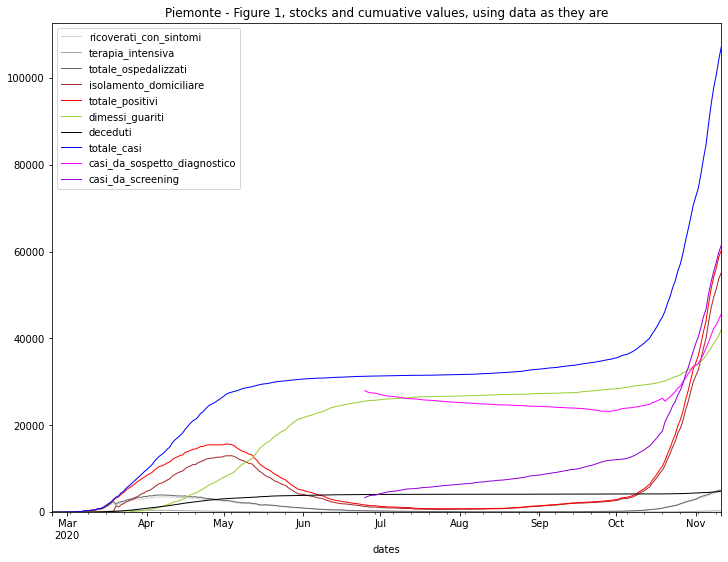

In [5]:
plt.rcParams['figure.figsize'] = [12, 9]
area_data.plot.line(x='dates',    y=['ricoverati_con_sintomi', 'terapia_intensiva',
                                     'totale_ospedalizzati','isolamento_domiciliare',
                                     'totale_positivi',
                                     'dimessi_guariti','deceduti',
                                     'totale_casi',
                                     'casi_da_sospetto_diagnostico','casi_da_screening'], 
                    title=
                    area+" - Figure 1, stocks and cumuative values, using data as they are",
                    color=colorDict,lw=1,ylim=(0,1.05*max(area_data['totale_casi'])));

<br/>

## Figure 1.1, paying attention to two curves plus one
  
Pay attention to the dynamic of the 'isolamento_domiciliare' curve and the 'casi_da_screening' one.  
  
We see a strong relation between them (not valid for all the regions). They are a **stock** and a **cumulative value**.  
  
Let us define a 14 days difference in 'casi_da_screening,' considering this value to approximate the **stock** of quarantine simultaneously present cases. Its dynamic is quite similar to that of the 'isolamento_domiciliare' **stock**. we name it 'casi_da_screening_diff14days'.

In [6]:
area_data['casi_da_screening_diff14days'] = area_data.casi_da_screening - \
                                             area_data.casi_da_screening.shift(14)

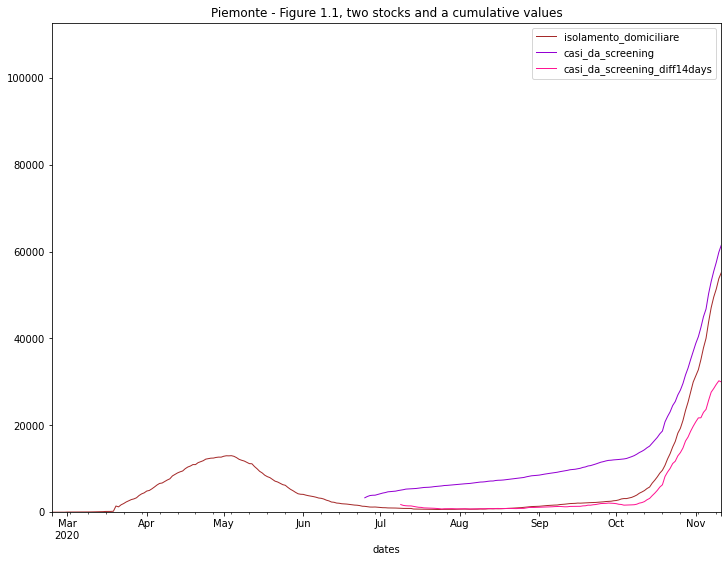

In [7]:
plt.rcParams['figure.figsize'] = [12, 9]
area_data.plot.line(x='dates',    y=['isolamento_domiciliare','casi_da_screening',
                                     'casi_da_screening_diff14days'], 
                    title=area+" - Figure 1.1, two stocks and a cumulative values",
                    color=colorDict,lw=1,ylim=(0,1.05*max(area_data['totale_casi'])));

<br/>

## Figure 1.2a-b, about stock data which are comparable over time, with two vertical scales
  

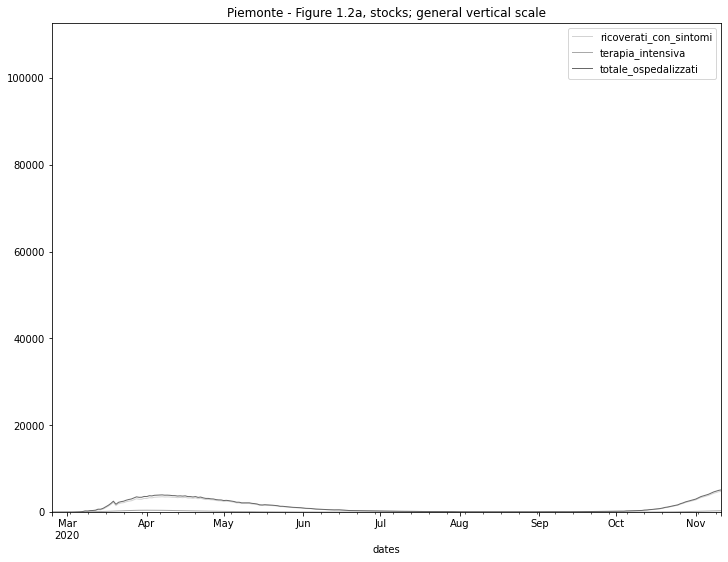

In [8]:
plt.rcParams['figure.figsize'] = [12, 9]
area_data.plot.line(x='dates',y=['ricoverati_con_sintomi',
                                    'terapia_intensiva','totale_ospedalizzati'], 
                            title=area+" - Figure 1.2a, stocks; general vertical scale",
                            color=colorDict,lw=1,ylim=(0,1.05*max(area_data['totale_casi'])));

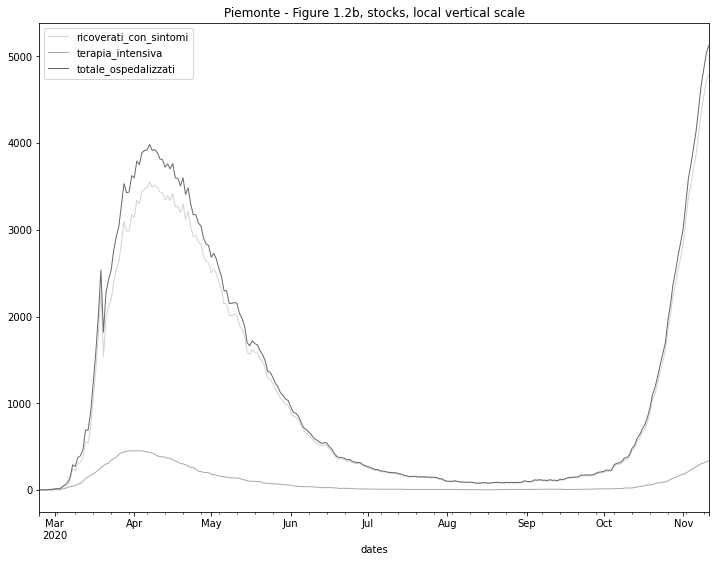

In [9]:
plt.rcParams['figure.figsize'] = [12, 9]
area_data.plot.line(x='dates',y=['ricoverati_con_sintomi',
                                    'terapia_intensiva','totale_ospedalizzati'], 
                            title=area+" - Figure 1.2b, stocks, local vertical scale",
                            color=colorDict,lw=1);

<br/>

## Figure 1.3, about a cumulative datum which is comparable over time

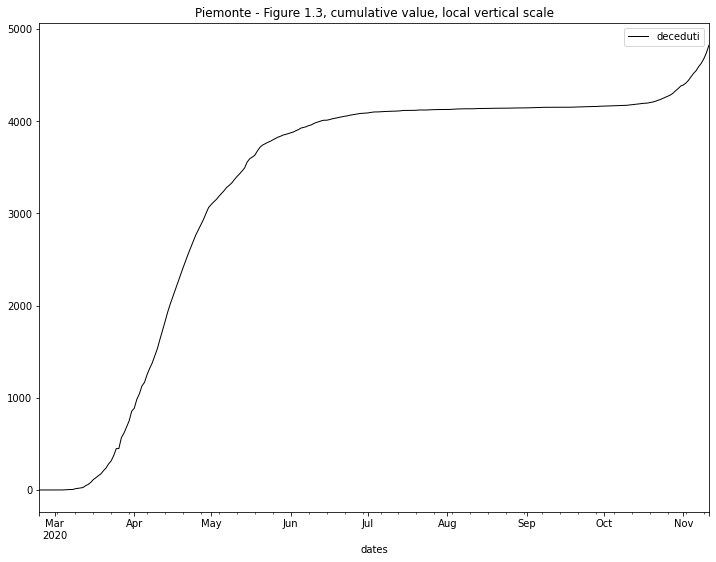

In [10]:
plt.rcParams['figure.figsize'] = [12, 9]
area_data.plot.line(x='dates',y=['deceduti'], 
                            title=area+" - Figure 1.3, cumulative value, local vertical scale",
                            color=colorDict,lw=1);

<br/>

# Figure 2, trying the make the data comparable  
  
The data in Figure 1 are the published data, certainly correct ones, but quite problematic if we want to compare the current situation to April. The data in Figure 1 are the published data, undoubtedly correct, but quite complicated if we compare the current situation and April.  
  
In Fig. 1, we introduce 'casi_da_screening_diff14days' as an approximation of the quarantine simultaneously present cases.  

We can consistently correct the cumulative values of 'totale_casi' subtracting 'casi_da_screening', another cumulative value.

Nota Bene  
The results are not significant for all the regions.

In [11]:
area_data['totale_casi_corr']=area_data['totale_casi'] - \
                                  area_data['casi_da_screening']

In [12]:
area_data['totale_positivi_corr']=area_data['totale_positivi'] - \
                                  area_data['casi_da_screening_diff14days']

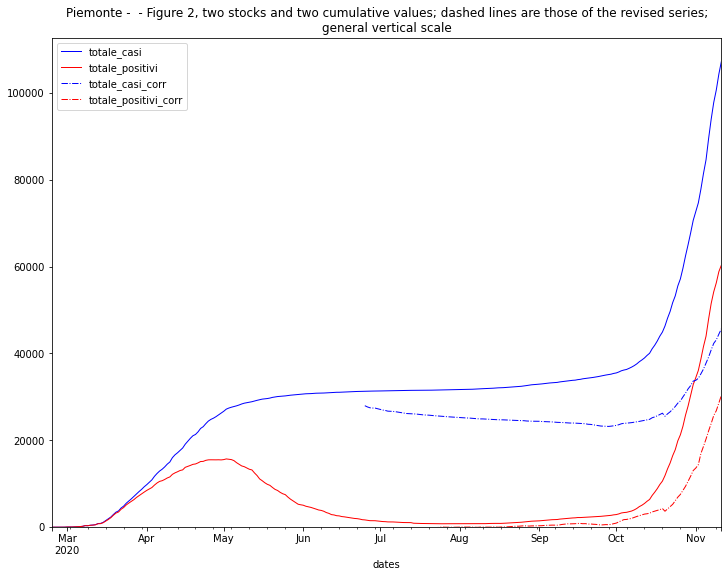

In [13]:
plt.rcParams['figure.figsize'] = [12, 9]
area_data.plot.line(x='dates',    y=['totale_casi','totale_positivi',
                                     'totale_casi_corr','totale_positivi_corr'],
                    title=area+" -  - Figure 2, two stocks and two cumulative values;"+
                               " dashed lines are those of the revised series;\n"+
                               "general vertical scale",
                    color=colorDict, lw=1,style=["-","-","-.","-."],
                    ylim=(0,1.05*max(area_data['totale_casi'])));

In [36]:
area_data['totale_casiD']=area_data.totale_casi[-50:].diff()
area_data['totale_positiviD']=area_data.totale_positivi[-50:].diff()
area_data['totale_casi_corrD']=area_data.totale_casi_corr[-50:].diff()
area_data['totale_positivi_corrD']=area_data.totale_positivi_corr[-50:].diff()

area_data['totale_casiDD']=area_data.totale_casiD.diff()
area_data['totale_positiviDD']=area_data.totale_positiviD.diff()
area_data['totale_casi_corrDD']=area_data.totale_casi_corrD.diff()
area_data['totale_positivi_corrDD']=area_data.totale_positivi_corrD.diff()

area_data['dates2']=area_data.dates[-50:]

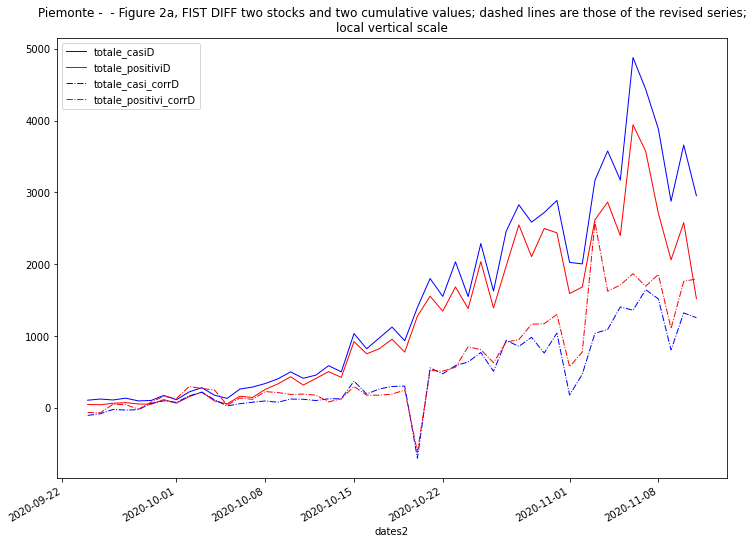

In [32]:
plt.rcParams['figure.figsize'] = [12, 9]
area_data.plot.line(x='dates2',    y=['totale_casiD','totale_positiviD',
                                     'totale_casi_corrD','totale_positivi_corrD'],
                    title=area+" -  - Figure 2a, FIST DIFF two stocks and two cumulative values;"+
                               " dashed lines are those of the revised series;\n"+
                               "local vertical scale",
                    color=colorDict, lw=1,style=["-","-","-.","-."]);

In [38]:
area_data['totale_positiviDD']

13         NaN
34         NaN
55         NaN
76         NaN
97         NaN
         ...  
5410    -369.0
5431    -865.0
5452    -649.0
5473     520.0
5494   -1060.0
Name: totale_positiviDD, Length: 262, dtype: float64

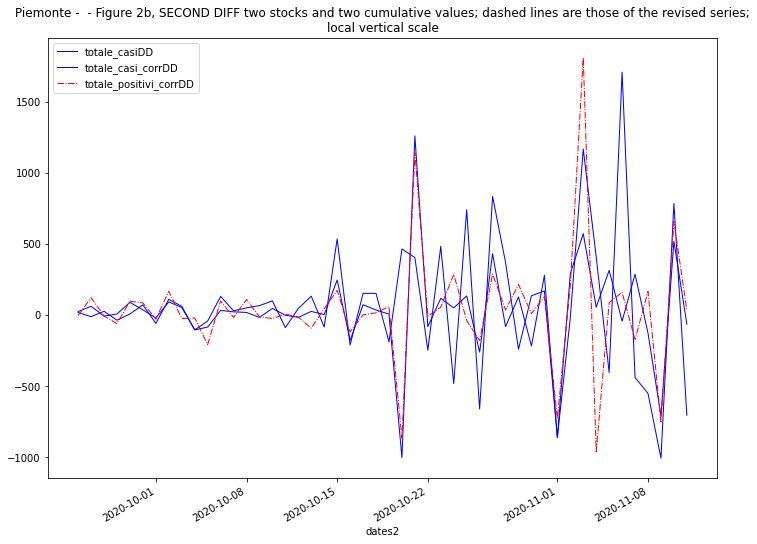

In [39]:
plt.rcParams['figure.figsize'] = [12, 9]
area_data.plot.line(x='dates2',    y=['totale_casiDD',#'totale_positiviDD',
                                     'totale_casi_corrDD','totale_positivi_corrDD'],
                    title=area+" -  - Figure 2b, SECOND DIFF two stocks and two cumulative values;"+
                               " dashed lines are those of the revised series;\n"+
                               "local vertical scale",
                    color=colorDict, lw=1,style=["-","-","-.","-."]);

<br/>

# Figure 3, showing 'tamponi' and 'casi_testati' with 'totale_casi' and 'casi_da_screening' (cumulative values)

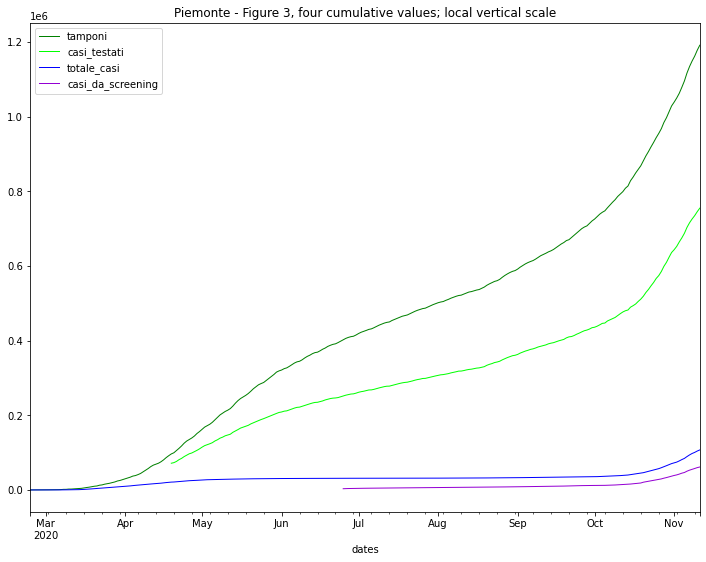

In [15]:
plt.rcParams['figure.figsize'] = [12, 9]
area_data.plot(x='dates',y=['tamponi', 'casi_testati',
                            'totale_casi','casi_da_screening'],
                  color=colorDict,lw=1,
                  title=area+" - Figure 3, four cumulative values; local vertical scale");

<br/>
  
# Ratios 'casi_da_screening' / 'casi_testati', with a delay  
  
We have: 
  
    - a description of the values of the last 20 days;
    
    - daily ratios in a given set of delays;
    
    - a graphical representation with delay 10 or 5.

In [16]:
area_data[-20:][['dates','casi_da_screening','tamponi', 
                 'casi_testati']].describe().iloc[[1,2,3,7],[0,1,2]]

,casi_da_screening,tamponi,casi_testati
mean,41150.150000,1.050287e+06,650273.050000
std,12040.779089,8.608524e+04,66543.489229
min,24549.000000,9.196290e+05,547164.000000
max,61569.000000,1.191915e+06,755259.000000


In [17]:
mean_casi_da_screening=area_data[-20:][['dates','casi_da_screening','tamponi', 
                 'casi_testati']].describe().iloc[[1],[0]].values[0][0]

In [18]:
mean_casi_testati=area_data[-20:][['dates','casi_da_screening','tamponi', 
                 'casi_testati']].describe().iloc[[1],[2]].values[0][0]

In [19]:
format="\nLast 20 days ratio (ending %.10s) 'casi_da_screening' (20 days mean) "+\
        "/ \n'casi_testati' (20 days mean):\n\n %.2f%%"
print(format %
(area_data[-1:][['dates']].values[0][0],  100 * mean_casi_da_screening / mean_casi_testati) )


Last 20 days ratio (ending 2020-11-11) 'casi_da_screening' (20 days mean) / 
'casi_testati' (20 days mean):

 6.33%


In [20]:
for delay in range (10,4,-1):
    print(area+" - Ratio 'casi_da_screening' %.10s / 'casi_testati' %.10s: %.2f%%" %
      (area_data[-1:][['dates']].values[0][0],
       area_data[-1-delay:-delay][['dates']].values[0][0],
       100*area_data[-1:][['casi_da_screening']].values[0][0] / \
    area_data[-1-delay:-delay][['casi_testati']].values[0][0]))

Piemonte - Ratio 'casi_da_screening' 2020-11-11 / 'casi_testati' 2020-11-01: 9.56%
Piemonte - Ratio 'casi_da_screening' 2020-11-11 / 'casi_testati' 2020-11-02: 9.43%
Piemonte - Ratio 'casi_da_screening' 2020-11-11 / 'casi_testati' 2020-11-03: 9.26%
Piemonte - Ratio 'casi_da_screening' 2020-11-11 / 'casi_testati' 2020-11-04: 9.11%
Piemonte - Ratio 'casi_da_screening' 2020-11-11 / 'casi_testati' 2020-11-05: 8.95%
Piemonte - Ratio 'casi_da_screening' 2020-11-11 / 'casi_testati' 2020-11-06: 8.75%


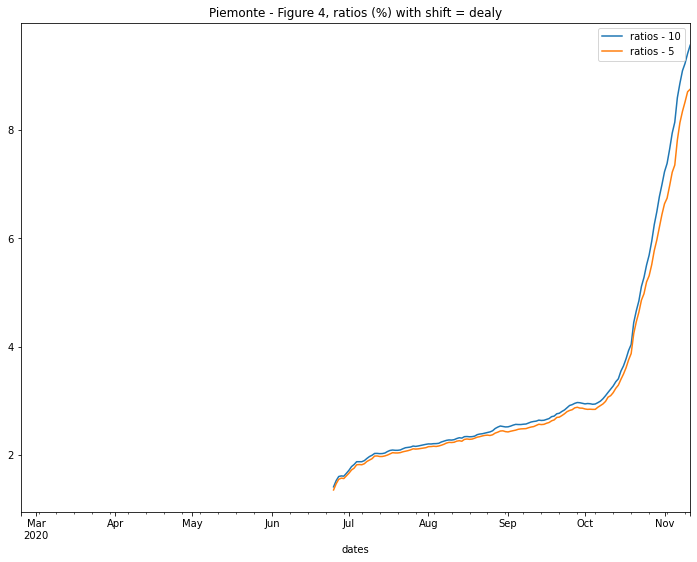

In [21]:
for delay in [10,5]:
    area_data['ratios - '+str(delay)]=100*area_data['casi_da_screening'] / \
    area_data['casi_testati'].shift(delay)

area_data.plot(x='dates',y=['ratios - '+str(10),'ratios - '+str(5)], 
    title=area+" - Figure 4, ratios (%) with shift = dealy");